In [59]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import cm
from sympy import symbols, diff

# Example  -4 Data visualization with 3D charts


## Minimise $$ f(x,y) = \frac{1}{3{-x^2-y^2} + 1} $$
## Minimise $$ f(x,y) = \frac{1} {r+1}$$ where r is $3^{-x^2-y^2}$

In [75]:
def f(x,y):
    r=3**(-x**2-y**2)
    return 1/(r+1)

In [76]:
#Making our X & Y data
x_4 = np.linspace(start=-2,stop=2,num=200)
y_4 = np.linspace(start=-2,stop=2,num=200)
print ('Shape of x array',x_4.shape)
#x_4 and y_4 are now 1 Dimentional only, to be plotted in 3d chard they must be 2 Dimentional.
#for that,
x_4,y_4 = np.meshgrid(x_4,y_4)
print('Shape of x array after mesh', x_4.shape)

Shape of x array (200,)
Shape of x array after mesh (200, 200)


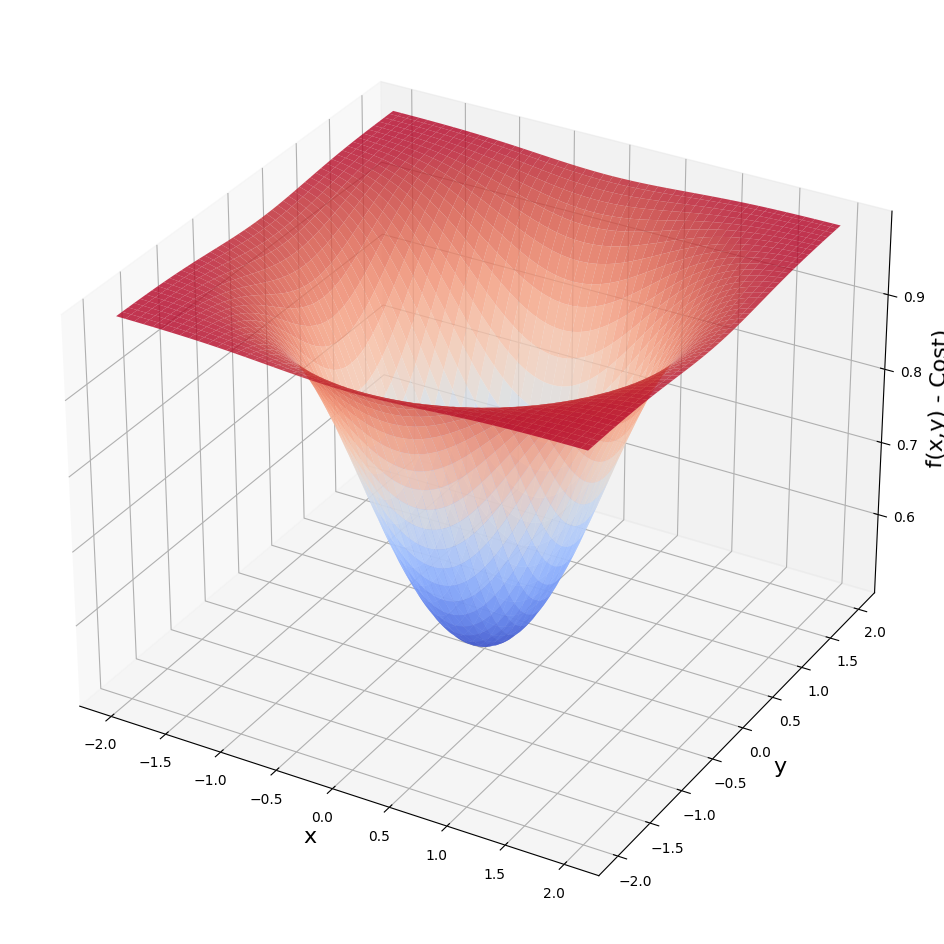

In [77]:
#Generating 3D plot
fig = plt.figure(figsize=[16,12])
# ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)
ax.set_zlabel('f(x,y) - Cost)',fontsize=16)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap = cm.coolwarm, alpha = 0.8)
plt.show()

# Partial Derivatives and Symbolic Computation

In [78]:
a,b= symbols('x,y')
#it means a stands for x, and b for y..

In [79]:
print (f(a,b))
#prints the equation wih the symbols 'x' and 'y'

1/(3**(-x**2 - y**2) + 1)


In [80]:
print (diff(f(a,b),a))
#prints the equation of the partial derivative with the symbols 'x' and 'y'

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


In [91]:
print(f(a,b).evalf(subs={a:1.8,b:1.0}))
#evalf - it evaluate and substitute x & y into our function.
#subs={a:1.8,b:1.0} , value of 'x' & 'y' at which you want to find the evaluate the cost
#a is the key, 1.8 is the value... A python dictionary, python gives both of a & b values at the same time
#Print the value of cost / f(x,y) at x=1.8 and y=1.0

0.990604794032582


In [92]:
print (diff(f(a,b),a).evalf(subs={a:1.8, b:1.0}))
#Print the value of partial derivative with respect to X.

0.0368089716197505


# Batch Gradient Descent with Sympy

In [124]:
#LET'S GOOOOO
multiplier = 0.1
max_iter = 377
params = np.array([1.8,1.0])
for n in range (max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
print ('values in gradient array', gradients)
print ('minimum occurs at x value of :', params[0])
print ('minimum occurs at y value of :', params[1])
print ('the cost is:', f(params[0],params[1]))

values in gradient array [2.09502760869969e-8 1.16390422705538e-8]
minimum occurs at x value of : 3.60444985973938e-8
minimum occurs at y value of : 2.00247214429966e-8
the cost is: 0.500000000000000
